### Minghao Zhong & Peter Vincent CS 814 Coursework Submission

# Import Required Libraries 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


# Create Our Available/Unavailable Spaces 

# Create A Map To Display Our Spaces 

In [2]:
# i suggest putting dimension selection into a single block so when it is fixed, you can get many different mazes without multiple input

a = int(input("Please enter the first dimension of the map :"))
b = int(input("Please enter the second dimension of the map :"))

Please enter the first dimension of the map :7
Please enter the second dimension of the map :7


In [3]:
nums = np.random.choice([0,1], size=(5,5),p=[.3, .7])
nums = np.random.choice([0,1], size=(a,b),p=[.3, .7])
nums[0,0] = 1
nums[a-1,b-1] = 1

def Make_map(x,y):
   
    # Create our state space
    #nums = np.random.choice([0,1], size=(x,y),p=[.3, .7])
    #nums[0,0] = 1
    #nums[x-1,y-1] = 1
    
    


    # Designate colours
    color1=(1,1,1)
    color2=(0/255,0/255,0/255)

    # Visually plot the state space
    my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list('my_cmap',['black','white'],2)
    plt.figure(figsize=(10, 10))
    cs=plt.imshow(nums,cmap=my_cmap,aspect='equal')
   
    plt.xticks(np.linspace(0,y,y,endpoint=False)-0.5,(),fontsize=0)
    plt.yticks(np.linspace(0,x,x,endpoint=False)-0.53,(),fontsize=0)
    plt.ylabel("Start >",
                   size=15,
                   rotation=0,
                   loc='top')
    plt.xlabel("Finish ^",
                   size=15,
                   rotation=0,
                   loc='right')
    plt.tick_params(bottom=False,left=False,labeltop=True,labelright=True)
    plt.grid(which='both')
    plt.show()

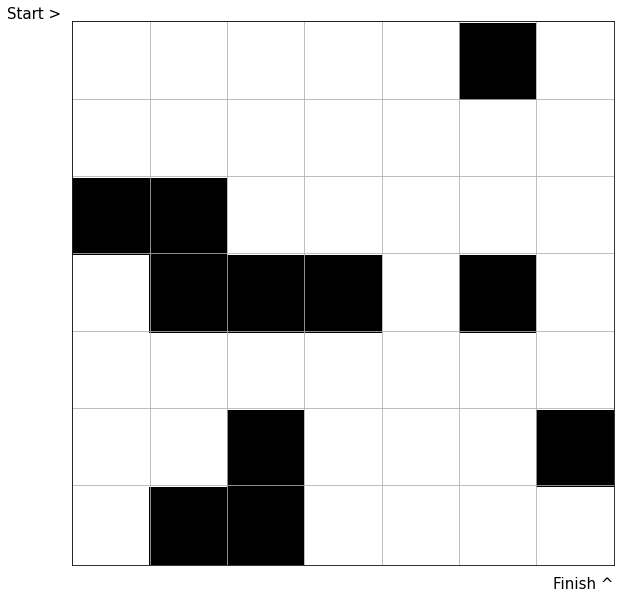

In [4]:
Make_map(a,b)

# Build an A* Algorithm to Answer the Problem

In [5]:
# Check if the state is valid
def checkValidState(state): 
    if state[0] > a-1 or state[0] < 0:
            return False
        
    if state[1] > b-1 or state[1] < 0:
            return False
    
    
    if nums[state[0]][state[1]] == 0:
        return False
    return True

# Check if the current node is the goal    
def goal(state):
    if state[0] == a-1 and state[1] == b-1:
        return True
    else:
        return False

# We have chosen to use the manhattan distance to the goal state as our heuristic to guide A* 
def heuristic(state):
        value = ( a - 1 - state[0]) + ( b - 1 - state[1])
        return value    
    
# A* = Choose lowest expected cost to goal. Cost is created through combing the previous journey 
# and the expected distance to the goal 


In [20]:
try:
    current = [0,0]
    
    visitedstate=[[0,0]]
    
    agenda = []
    
    valuelist = []

    global minvalue

# the order here matters, try run on the same maze with [0,1],[1,0] and [1,0],[0,1]    
    possibleActions = [[1,0],[-1,0],[0,1],[0,-1]]

    costlist = []

    cost = 0

    reach_cost = 1

    reach_cost_list = [0]
    
    while not goal(current):
    
        cost += 1
    
        print(reach_cost) 
    
        for move in possibleActions:
            
            nextstate = [current[i] + move[i] for i in range(2)]
            
            if nextstate not in visitedstate and nextstate not in agenda and checkValidState(nextstate):
            
                agenda.append(nextstate)
            
                if cost != reach_cost: 
                
                    real_cost = reach_cost + 1
                
                else:
            
                    real_cost = cost
            
                costlist.append(real_cost)
            
                valuelist.append(heuristic(nextstate))
    
        if len(agenda) == 1:
        
            current = agenda.pop(0)
        
            k = valuelist.pop(0)
        
            reach_cost = costlist.pop(0)
        
            visitedstate.append(current)
        
        else:        
            minvalue = valuelist[0] + costlist[0]
            

            for i in range(len(agenda)):
            
                if valuelist[i] + costlist[i] <= minvalue:
                
                
                    minvalue = valuelist[i] + costlist[i]
            
                    minindex = i
                    
            current = agenda.pop(minindex)
        
            reach_cost = costlist.pop(minindex)
        
            k = valuelist.pop(minindex) 
                    
            visitedstate.append(current)
        
    
        reach_cost_list.append(reach_cost)
        
       
    
        print('k+cost',k+reach_cost,'cost',cost,'k',k,'reach_cost',reach_cost,current,'   ',agenda+[current])
    
        print(reach_cost_list)
        print(visitedstate)
    

        
    print('The length of the route is {}'.format(len(visitedstate)))
    
except IndexError:
    
    print('No way out! Try another maze.')
    
else:
    print('Visualise the route using the following code')


1
k+cost 12 cost 1 k 11 reach_cost 1 [0, 1]     [[1, 0], [0, 1]]
[0, 1]
[[0, 0], [0, 1]]
1
k+cost 12 cost 2 k 10 reach_cost 2 [0, 2]     [[1, 0], [1, 1], [0, 2]]
[0, 1, 2]
[[0, 0], [0, 1], [0, 2]]
2
k+cost 12 cost 3 k 9 reach_cost 3 [0, 3]     [[1, 0], [1, 1], [1, 2], [0, 3]]
[0, 1, 2, 3]
[[0, 0], [0, 1], [0, 2], [0, 3]]
3
k+cost 12 cost 4 k 8 reach_cost 4 [0, 4]     [[1, 0], [1, 1], [1, 2], [1, 3], [0, 4]]
[0, 1, 2, 3, 4]
[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4]]
4
k+cost 12 cost 5 k 7 reach_cost 5 [1, 4]     [[1, 0], [1, 1], [1, 2], [1, 3], [1, 4]]
[0, 1, 2, 3, 4, 5]
[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [1, 4]]
5
k+cost 12 cost 6 k 6 reach_cost 6 [1, 5]     [[1, 0], [1, 1], [1, 2], [1, 3], [2, 4], [1, 5]]
[0, 1, 2, 3, 4, 5, 6]
[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [1, 4], [1, 5]]
6
k+cost 12 cost 7 k 5 reach_cost 7 [1, 6]     [[1, 0], [1, 1], [1, 2], [1, 3], [2, 4], [2, 5], [1, 6]]
[0, 1, 2, 3, 4, 5, 6, 7]
[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [1, 4], [1, 5], [1, 6]]
7
k+cos

In [ ]:
for i

In [22]:
new_nums = nums.tolist()
set_of_reach_cost_set = set(reach_cost_list)
k = len(set_of_reach_cost_set)
#k = len(visitedstate)
j = 0
for item in visitedstate:
    
    new_nums[item[0]][item[1]] = 0.9 - (reach_cost_list[j]/(1.25*k))
    
    j +=1


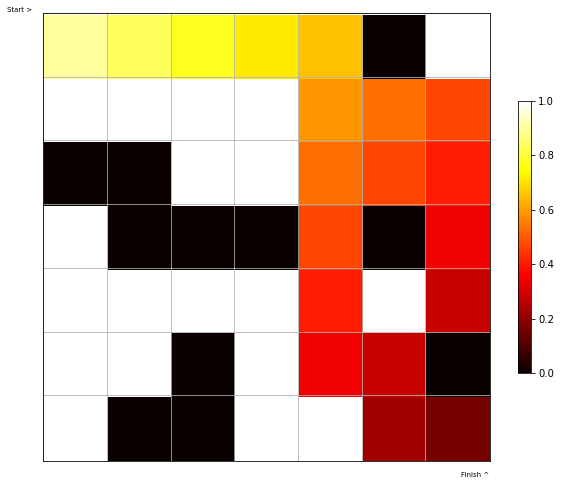

Our algorithm took the route indicated below. Please bear in mind the list does not contain traditional coordinates instead they contain the row and column position. Therefore please read 0,0 as the first position indicated by start.
[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [1, 4], [1, 5], [1, 6], [2, 6], [3, 6], [4, 6], [2, 5], [2, 4], [3, 4], [4, 4], [5, 4], [5, 5], [6, 5], [6, 6]]


In [30]:
color1=(1,1,1)
color2=(0/255,0/255,0/255)
color3=(150/255,150/255,150/255)

# Visually plot the state space

plt.figure(figsize=(10, 10))

cs=plt.imshow(new_nums,cmap='hot',aspect='equal')
plt.xticks(np.linspace(0,b,b,endpoint=False)-0.51,(),fontsize=0)
plt.yticks(np.linspace(0,a,a,endpoint=False)-0.53,(),fontsize=0)
plt.ylabel("Start >",
            size=a,
            rotation=0,
            loc='top')
plt.xlabel("Finish ^",
            size=a,
            rotation=0,
            loc='right')
plt.tick_params(bottom=False,left=False,labeltop=True,labelright=True)
plt.grid(which='both')
plt.colorbar(shrink =0.5)
plt.show()
print('Our algorithm took the route indicated below. Please bear in mind the list does not contain traditional coordinates instead they contain the row and column position. Therefore please read 0,0 as the first position indicated by Start.')
print(visitedstate)

In [ ]:
for 

---------------------------------------- Test code down there ---------------------------------------------------------------------------

In [2]:
nums = [[1,0,1,1,1],[1,1,1,0,1,],[1,0,1,0,1],[1,0,1,0,1],[1,1,1,0,1]]
#nums = np.random.choice([0,1], size=(5,5),p=[.3, .7])
#nums = np.random.choice([0,1], size=(a,b),p=[.3, .7])
#nums[0,0] = 1
#nums[a-1,b-1] = 1

def Make_map(x,y):
   
    # Create our state space
    #nums = np.random.choice([0,1], size=(x,y),p=[.3, .7])
    #nums[0,0] = 1
    #nums[x-1,y-1] = 1
    
    


    # Designate colours
    color1=(1,1,1)
    color2=(0/255,0/255,0/255)

    # Visually plot the state space
    my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list('my_cmap',['black','white'],2)
    plt.figure(figsize=(10, 10))
    cs=plt.imshow(nums,cmap=my_cmap,aspect='equal')
   
    plt.xticks(np.linspace(0,y,y,endpoint=False)-0.5,(),fontsize=0)
    plt.yticks(np.linspace(0,x,x,endpoint=False)-0.53,(),fontsize=0)
    plt.ylabel("Start >",
                   size=15,
                   rotation=0,
                   loc='top')
    plt.xlabel("Finish ^",
                   size=15,
                   rotation=0,
                   loc='right')
    plt.tick_params(bottom=False,left=False,labeltop=True,labelright=True)
    plt.grid(which='both')
    plt.show()

In [3]:
# Check if the state is valid
def checkValidState(state): 
    if state[0] > 5-1 or state[0] < 0:
            return False
        
    if state[1] > 5-1 or state[1] < 0:
            return False

    if nums[state[0]][state[1]] == 0:
        return False
    return True

# Check if the current node is the goal    
def goal(state):
    if state[0] == 5-1 and state[1] == 5-1:
        return True
    else:
        return False

# We have chosen to use the manhattan distance to the goal state as our heuristic to guide A* 
def heuristic(state):
        value = ( 5- 1 - state[0]) + ( 5- 1 - state[1])
        return value    
    
# A* = Choose lowest expected cost to goal. Cost is created through combing the previous journey 
# and the expected distance to the goal 

# What path did the robot take? 

In [10]:
for i in reversed(reach_cost_list):
    
    print(i)

10
9
8
7
6
5
4
7
4
3
2
6
5
4
3
2
1


In [6]:
#new_nums = nums.tolist()
#index = 1 
#k = len(path)
#for item in path:
    
#    nums[item[0]][item[1]] = 0.9 - (index/(1.25*k))
#    index += 1

In [ ]:
index = 1 

set_of_reach_cost_set = set(reach_cost_list)
k= len(set_of_reach_cost_set)
#k = len(visitedstate)
j = 1
for i in reach_cost_list:
    
    nums[visitedstate[j][0]][visitedstate[j][1]] = 0.9 - (i/(1.25*k))
    

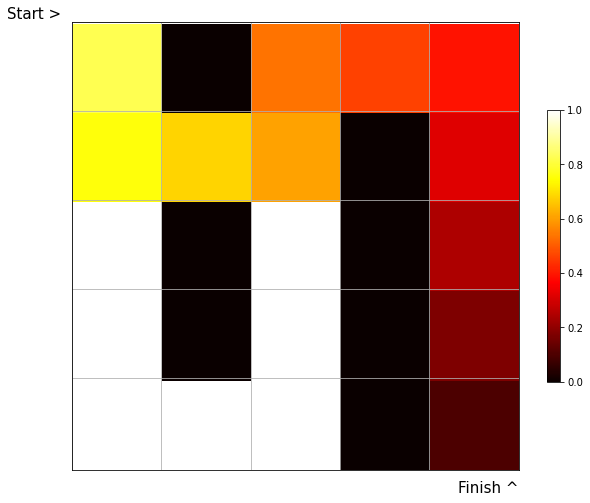

In [7]:
color1=(1,1,1)
color2=(0/255,0/255,0/255)
color3=(150/255,150/255,150/255)

# Visually plot the state space

plt.figure(figsize=(10, 10))

cs=plt.imshow(nums,cmap='hot',aspect='equal')

plt.xticks(np.linspace(0,5,5,endpoint=False)-0.51,(),fontsize=0)
plt.yticks(np.linspace(0,5,5,endpoint=False)-0.53,(),fontsize=0)
plt.ylabel("Start >",
            size=15,
            rotation=0,
            loc='top')
plt.xlabel("Finish ^",
            size=15,
            rotation=0,
            loc='right')
plt.tick_params(bottom=False,left=False,labeltop=True,labelright=True)
plt.grid(which='both')
plt.colorbar(shrink =0.5)
plt.show()



In [ ]:
visitedstate

# To do 

1. Fix lines in graph
2. Condense the code into one unit
3. Make trace incrementally darker   done
4. Ensure constant functionality

In [ ]:

current = [0,0]
    
visitedstate=[[0,0]]
    
agenda = []
    
valuelist = []


# the order here matters, try run on the same maze with [0,1],[1,0] and [1,0],[0,1]    
possibleActions = [[1,0],[-1,0],[0,1],[0,-1]]

costlist = []

cost = 0

current_reach_cost = 1
    
while not goal(current):
    
    cost += 1   
    
    for move in possibleActions:
        
        
            
        nextstate = [current[i] + move[i] for i in range(2)]
            
        if nextstate not in visitedstate and nextstate not in agenda and checkValidState(nextstate):
            
            agenda.append(nextstate)
            
            real_cost = cost
            
            costlist.append(real_cost)
            
            valuelist.append(heuristic(nextstate))
            
            
            
    
    if len(agenda) == 1:
        
        current = agenda.pop(0)
        
        k = valuelist.pop(0)
        
        reach_cost = costlist.pop(0)
        
        visitedstate.append(current)
        
    else:        
        minvalue = valuelist[0] + costlist[0]
            

        for i in range(len(agenda)):
            
            if valuelist[i] + costlist[i] <= minvalue:
                
                minvalue = valuelist[i] + costlist[i]
            
                global minindex
            
                minindex = i
                    
        current = agenda.pop(minindex)
               
        reach_cost = costlist.pop(minindex)
        
        k = valuelist.pop(minindex) 
                    
        visitedstate.append(current)
    
    print(cost+k,current,agenda+[current])
        
print('The length of the route is {}'.format(len(visitedstate)))


In [ ]:
nums = np.random.choice([0,1], size=(x,y),p=[.3, .7])
nums[0,0] = 1
nums[x-1,y-1] = 1 
new_nums = nums.tolist()

In [ ]:
list1= [2,3,4,7,5,2]
mini = list1[0]
minindex = 0
for i in (1,len(list1)-1):
    
    
    if list1[i] <= mini:
        
        mini = list1[i]
    
        minindex = i
    
    
            
    

In [ ]:
mini

In [ ]:
minindex

In [ ]:
a=None
b=5
min(a,b)

In [33]:
try:
    current = [0,0]
    
    visitedstate=[[0,0]]
    
    agenda = []
    
    valuelist = []


# the order here matters, try run on the same maze with [0,1],[1,0] and [1,0],[0,1]    
    possibleActions = [[1,0],[-1,0],[0,1],[0,-1]]

    costlist = []

    cost = 0

    current_reach_cost = 1
    
    while not goal(current):
    
        cost += 1   
    
        for move in possibleActions:
        
        
            
            nextstate = [current[i] + move[i] for i in range(2)]
            
            if nextstate not in visitedstate and nextstate not in agenda and checkValidState(nextstate):
            
                agenda.append(nextstate)
            
                real_cost = min(cost,current_reach_cost)
            
                costlist.append(real_cost)
            
                valuelist.append(heuristic(nextstate))
            
    
        if len(agenda) == 1:
        
            current = agenda.pop(0)
        
            valuelist.pop(0)
        
            costlist.pop(0)
        
            visitedstate.append(current)
        
        else:        
            minvalue = valuelist[0] + costlist[0]
            

            for i in range(len(agenda)):
            
                if valuelist[i] + costlist[i] <= minvalue:
                
                    minvalue = valuelist[i] + costlist[i]
            
                    global minindex
            
                    minindex = i
                    
            current = agenda.pop(minindex)
               
            current_reach_cost = costlist.pop(minindex)
        
            valuelist.pop(minindex) 
                    
            visitedstate.append(current)
    print('The length of the route is {}'.format(len(visitedstate)))
    
except IndexError:
    
    print('No way out! Try another maze.')
    
else:
    print('Visualise the route using the following code')


The length of the route is 23
Visualise the route using the following code


In [ ]:
list1= [2,3,4,7,5,2]

In [ ]:
list1[-1]

In [ ]:
current = [5,5,6]
possibleActions = [[1,0,1],[-1,0,1],[0,1,0],[0,-1,-1]]
for _ in possibleActions:
        
        
            
        nextstate = [current[i] + _[i] for i in range(3)]
        
        print(nextstate)

In [ ]:
list(range(2))

In [ ]:
current[0]

In [ ]:
for move in possibleActions:
    print(move)


In [ ]:
nums = [[1,0,1,1,1],[1,1,1,0,1,],[1,0,1,0,1],[1,0,1,0,1],[1,1,1,0,1]]    
nums[5][0]

In [ ]:
np.random.choice([0,1], size=(5,5),p=[.3, .7])

In [ ]:
m=0
n = 0
while n % 3 ==1:
    
    print(n,m)
    
    

In [21]:
#new_nums = nums.tolist()
index = 1 

set_of_reach_cost_set = set(reach_cost_list)
k= len(set_of_reach_cost_set)
#k = len(visitedstate)
j = 1
for i in reach_cost_list:
    
    nums[visitedstate[j][0]][visitedstate[j][1]] = 0.9 - (i/(1.25*k))
    
    j += 1
    
k= 0     
for i in range(len(set_of_reach_cost)):
    
    for _ in reversed(reach_cost_list):
        
        if (i+1) == _:
            
            print(reversed(visitedstate[k])
            
            break      
        k += 1 
                  
    
                  
                
            
            

    

SyntaxError: invalid syntax (<ipython-input-21-bc2ff305917c>, line 23)

In [46]:

reverse = []

de = list(reach_cost_list)  

reverse.append(de.pop())



while de:
    
    
    latter = de.pop()
    
    reverse.append(latter)

    if reverse[-1] != reverse[-2] -1:
        
        break
real_route= []   
l = len(reverse)-1

for i in range(l):
    
    real_route.append(visitedstate.pop())
    

path = visitedstate[:(k-l)] + real_route[::-1] 

